# Tutorial for Volumetric Interpolation Code
This tutorial will show how to use the volumetricinterp package to evalutate the electron density anywhere in an AMISR FoV.

## Estimate Values
Use the Estimate class to estimate values based on an interpolated coefficient file.  First create an Estimate instance by passing the name of the coefficient file.

In [3]:
from volumetricinterp import Estimate

params = Estimate('20161127.002_lp_1min-fitcal_volint.h5')

Define a set of points to evaluate the density at.  The location arrays (glat, glon, galt) must be equal in shape.

In [30]:
import numpy as np
import datetime as dt

time = dt.datetime(2016,11,27,23,56)
galt = np.arange(100., 500., 10.)
glat = np.full(galt.shape, 79.)
glon = np.full(galt.shape, -90.)


Call the Estimate class to get the interpolated electron density.

In [31]:
density = params(time, glat, glon, galt)

Plot the output density

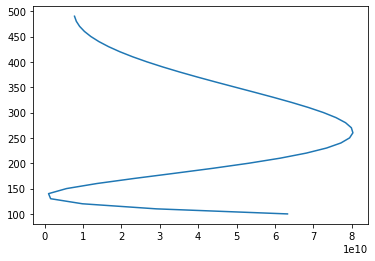

In [32]:
import matplotlib.pyplot as plt

plt.plot(density, galt)

The location arrays (glat, glon, galt) can be multidimensional.

In [45]:
glat, glon, galt = np.meshgrid(np.arange(74., 82., 0.5), np.arange(-105., -65., 3.), np.arange(100., 800., 25.))

density = params(time, glat, glon, galt)

print(glat.shape, glon.shape, galt.shape, density.shape)


(14, 16, 28) (14, 16, 28) (14, 16, 28) (14, 16, 28)


Text(0.5, 1.0, 'Electron Density 350.0 km')

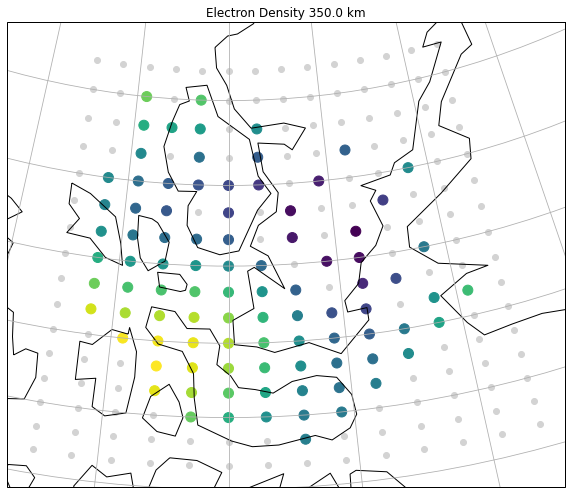

In [51]:
import cartopy.crs as ccrs

map_proj = ccrs.LambertConformal(central_latitude=77., central_longitude=-90.)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()
ax.gridlines()

aidx = 10
ax.scatter(glon[:,:,aidx], glat[:,:,aidx], c='lightgrey', transform=ccrs.Geodetic())
ax.scatter(glon[:,:,aidx], glat[:,:,aidx], c=density[:,:,12], s=100, transform=ccrs.Geodetic())

ax.set_title('Electron Density {} km'.format(galt[0,0,aidx]))
